In [1]:
# conda install condastats 
# pip install pypistats

In [2]:
import pandas as pd
import urllib, json
import matplotlib.pyplot as plt
import time
import numpy as np

from condastats.cli import overall, pkg_platform, pkg_version, pkg_python, data_source
from pypistats import overall as overall_pypi

month = '2022-07'
start_date = '2022-07-01'
end_date = '2022-07-31'

In [3]:
# check which months exist on conda
p = pkg_python('devbio-napari', monthly=True)
p

pkg_name       time     pkg_python
devbio-napari  2022-04                 304
               2022-05                 391
               2022-06                 842
               2022-07                1994
Name: counts, dtype: int64

In [4]:
def get_all_plugin_data():
    url = 'https://api.napari-hub.org/plugins'

    json_url = urllib.request.urlopen(url) 
    data = json.loads(json_url.read()) 
    #print (data)
    return data

def get_plugin_index():
    data = get_all_plugin_data()
    return list(data.keys())

all_plugins = get_plugin_index()

df = pd.DataFrame({'plugin':all_plugins})

In [5]:
def add_condastats(df):
    conda_downloads = []
    for name in df['plugin']:
        print(name)
        try:
            p = pkg_python(name, month=month)
            num_downloads = p[0]
        except:
            print("Error")
            num_downloads = np.nan
        conda_downloads.append(num_downloads)

    df['conda_downloads'] = conda_downloads

add_condastats(df)

Image-Composer
Error
Image-Part-Selecter
Error
Label-Creator
Error
Layer-Data-Replace
Error
Offset-Subtraction
Error
PartSeg
Error
Partial-Aligner
Error
PlatyMatch
Error
RedLionfish
Error
World2Data
Error
affinder
arcos-gui
avidaq
Error
bbii-decon
beetlesafari
bfio
Error
blik
brainglobe-napari-io
brainreg-napari
Error
brainreg-segment
btrack
cellfinder-napari
cellpose-napari
devbio-napari
disease-classifier
Error
elastix-napari
Error
empanada-napari
Error
faser
Error
grabber-ift
guanine-crystal-analysis
Error
hesperos
iacs-ipac-reader
imaxt-multiscale-plugin
Error
misic-napari
morphometrics
napari-3d-ortho-viewer
napari-DeepSpot
Error
napari-IDS
Error
napari-IP-workflow
Error
napari-ISM
Error
napari-J
Error
napari-LF
Error
napari-PHILOW
Error
napari-PICASSO
Error
napari-accelerated-pixel-and-object-classification
napari-affinities
Error
napari-aicsimageio
napari-aideveloper
Error
napari-allencell-annotator
Error
napari-allencell-segmenter
napari-animated-gif-io
napari-animation
napari-

In [6]:
df

,plugin,conda_downloads
0,Image-Composer,NaN
1,Image-Part-Selecter,NaN
2,Label-Creator,NaN
3,Layer-Data-Replace,NaN
4,Offset-Subtraction,NaN
5,PartSeg,NaN
6,Partial-Aligner,NaN
7,PlatyMatch,NaN
8,RedLionfish,NaN
9,World2Data,NaN


In [7]:
def add_pypistats(df):
    pypi_downloads = []
    for name in df['plugin']:
        print(name)
        try:
            o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)
            without_mirrors = o[o['category']  == 'without_mirrors']
            num_downloads = without_mirrors['downloads'].sum()
        except:
            print("Error")
            num_downloads = np.nan
        pypi_downloads.append(num_downloads)

    df['pypi_downloads'] = pypi_downloads

add_pypistats(df)

Image-Composer
Image-Part-Selecter
Label-Creator
Layer-Data-Replace
Offset-Subtraction
PartSeg
Partial-Aligner
PlatyMatch
RedLionfish
World2Data
affinder
arcos-gui
avidaq


C:\Users\rober\AppData\Local\Temp\ipykernel_6064\2894383271.py:6: UserWarning: Requested start date (2022-07-01) is before earliest available data (2022-07-21), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


bbii-decon
beetlesafari
bfio
blik
brainglobe-napari-io
brainreg-napari
brainreg-segment
btrack
cellfinder-napari
cellpose-napari
devbio-napari
disease-classifier
elastix-napari
empanada-napari
faser
grabber-ift
guanine-crystal-analysis


C:\Users\rober\AppData\Local\Temp\ipykernel_6064\2894383271.py:6: UserWarning: Requested start date (2022-07-01) is before earliest available data (2022-07-26), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


hesperos
iacs-ipac-reader
imaxt-multiscale-plugin


C:\Users\rober\AppData\Local\Temp\ipykernel_6064\2894383271.py:6: UserWarning: Requested start date (2022-07-01) is before earliest available data (2022-07-27), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


misic-napari
morphometrics
napari-3d-ortho-viewer
napari-DeepSpot
napari-IDS
napari-IP-workflow
napari-ISM
napari-J
napari-LF


C:\Users\rober\AppData\Local\Temp\ipykernel_6064\2894383271.py:6: UserWarning: Requested start date (2022-07-01) is before earliest available data (2022-07-21), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-PHILOW
napari-PICASSO
napari-accelerated-pixel-and-object-classification
napari-affinities
napari-aicsimageio
napari-aideveloper
napari-allencell-annotator


C:\Users\rober\AppData\Local\Temp\ipykernel_6064\2894383271.py:6: UserWarning: Requested start date (2022-07-01) is before earliest available data (2022-07-27), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-allencell-segmenter
napari-animated-gif-io
napari-animation
napari-annotator
napari-annotatorj
napari-apple
napari-apr-viewer
napari-arboretum
napari-assistant
napari-bigwarp
napari-bil-data-viewer
napari-bio-sample-data
napari-bioformats


C:\Users\rober\AppData\Local\Temp\ipykernel_6064\2894383271.py:6: UserWarning: Requested start date (2022-07-01) is before earliest available data (2022-07-12), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-bioimageio


C:\Users\rober\AppData\Local\Temp\ipykernel_6064\2894383271.py:6: UserWarning: Requested start date (2022-07-01) is before earliest available data (2022-07-05), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-blob-detection
napari-blossom
napari-boids
Error
napari-brightness-contrast
napari-brushsettings
napari-btrack-reader
napari-buds
Error
napari-ccp4map
napari-cellseg3d
napari-checkerboard
napari-cilia-beating-frequency


C:\Users\rober\AppData\Local\Temp\ipykernel_6064\2894383271.py:6: UserWarning: Requested start date (2022-07-01) is before earliest available data (2022-07-13), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-clemreg
napari-clusters-plotter
napari-compressed-labels-io
napari-console
napari-crop
napari-cryofibsem-monitor
napari-cupy-image-processing
napari-curtain
napari-czann-segment


C:\Users\rober\AppData\Local\Temp\ipykernel_6064\2894383271.py:6: UserWarning: Requested start date (2022-07-01) is before earliest available data (2022-07-11), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-czifile2
napari-deepfinder


C:\Users\rober\AppData\Local\Temp\ipykernel_6064\2894383271.py:6: UserWarning: Requested start date (2022-07-01) is before earliest available data (2022-07-25), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-deeplabcut
napari-deepmeta
napari-dexp
napari-dv
napari-dvid
napari-dzi-zarr
napari-elementary-numpy-operations
napari-em-reader
napari-error-reporter
napari-feature-classifier
napari-features
napari-filaments
napari-folder-browser
Error
napari-generic-SIMulator
Error
napari-geojson
napari-hdf5-labels-io
napari-help
Error
napari-image-stacker
napari-imaris-loader
napari-imc
Error
napari-imsmicrolink
napari-itk-io
napari-kics
napari-labelimg4classification
napari-labeling
napari-labelling-assistant
napari-labels-overlap
napari-lattice


C:\Users\rober\AppData\Local\Temp\ipykernel_6064\2894383271.py:6: UserWarning: Requested start date (2022-07-01) is before earliest available data (2022-07-19), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-layer-details-display
napari-layer-table
napari-lazy-openslide
napari-live-recording
napari-manual-transforms
Error
napari-mat-images
Error
napari-math
Error
napari-matplotlib
napari-medical-image-formats
napari-metroid
Error
napari-micromanager
Error
napari-microscope
napari-mm3
napari-molecule-reader
napari-mouse-controls
Error
napari-mrcfile-handler
Error
napari-mrcfile-reader
Error
napari-mri
Error
napari-multitask
napari-nD-annotator
Error
napari-nasa-samples
Error
napari-nd-cropper
Error
napari-nd2-folder-viewer
Error
napari-ndtiffs
Error
napari-nikon-nd2
Error
napari-nlm
Error
napari-nucleaizer
Error
napari-omaas
Error
napari-ome-zarr
Error
napari-omero
Error
napari-organoid-counter
Error
napari-patchcreator
Error
napari-pdf-reader
Error
napari-pdr-reader
Error
napari-plot
Error
napari-plot-profile
Error
napari-plugin-search
Error
napari-power-spectrum
Error
napari-pram
Error
napari-process-points-and-surfaces
Error
napari-properties-plotter
Error
napari-properties-viewer

In [8]:
df

,plugin,conda_downloads,pypi_downloads
0,Image-Composer,NaN,57.0
1,Image-Part-Selecter,NaN,55.0
2,Label-Creator,NaN,65.0
3,Layer-Data-Replace,NaN,52.0
4,Offset-Subtraction,NaN,52.0
5,PartSeg,NaN,684.0
6,Partial-Aligner,NaN,50.0
7,PlatyMatch,NaN,108.0
8,RedLionfish,NaN,203.0
9,World2Data,NaN,54.0


In [9]:
df.to_csv("stats_" + month + ".csv")

In [10]:
# remove plugins that are part of the napari distribution
remove_plugins = ["napari-console", "napari-svg"]
df = df[[x not in remove_plugins for x in df['plugin']]]

# remove nans
df = df.dropna()

In [11]:
df = df.sort_values('conda_downloads', ascending=False)

In [12]:
df

,plugin,conda_downloads,pypi_downloads
57,napari-assistant,2312.0,1012.0
23,devbio-napari,1994.0,329.0
44,napari-accelerated-pixel-and-object-classifica...,1442.0,441.0
80,napari-cupy-image-processing,937.0,248.0
75,napari-clusters-plotter,832.0,287.0
85,napari-deeplabcut,776.0,103.0
103,napari-imaris-loader,594.0,127.0
113,napari-layer-details-display,560.0,238.0
11,arcos-gui,494.0,179.0
83,napari-czifile2,493.0,201.0


In [13]:
# reindex to make the plotting work
df = pd.DataFrame(df.to_dict(orient='list'))

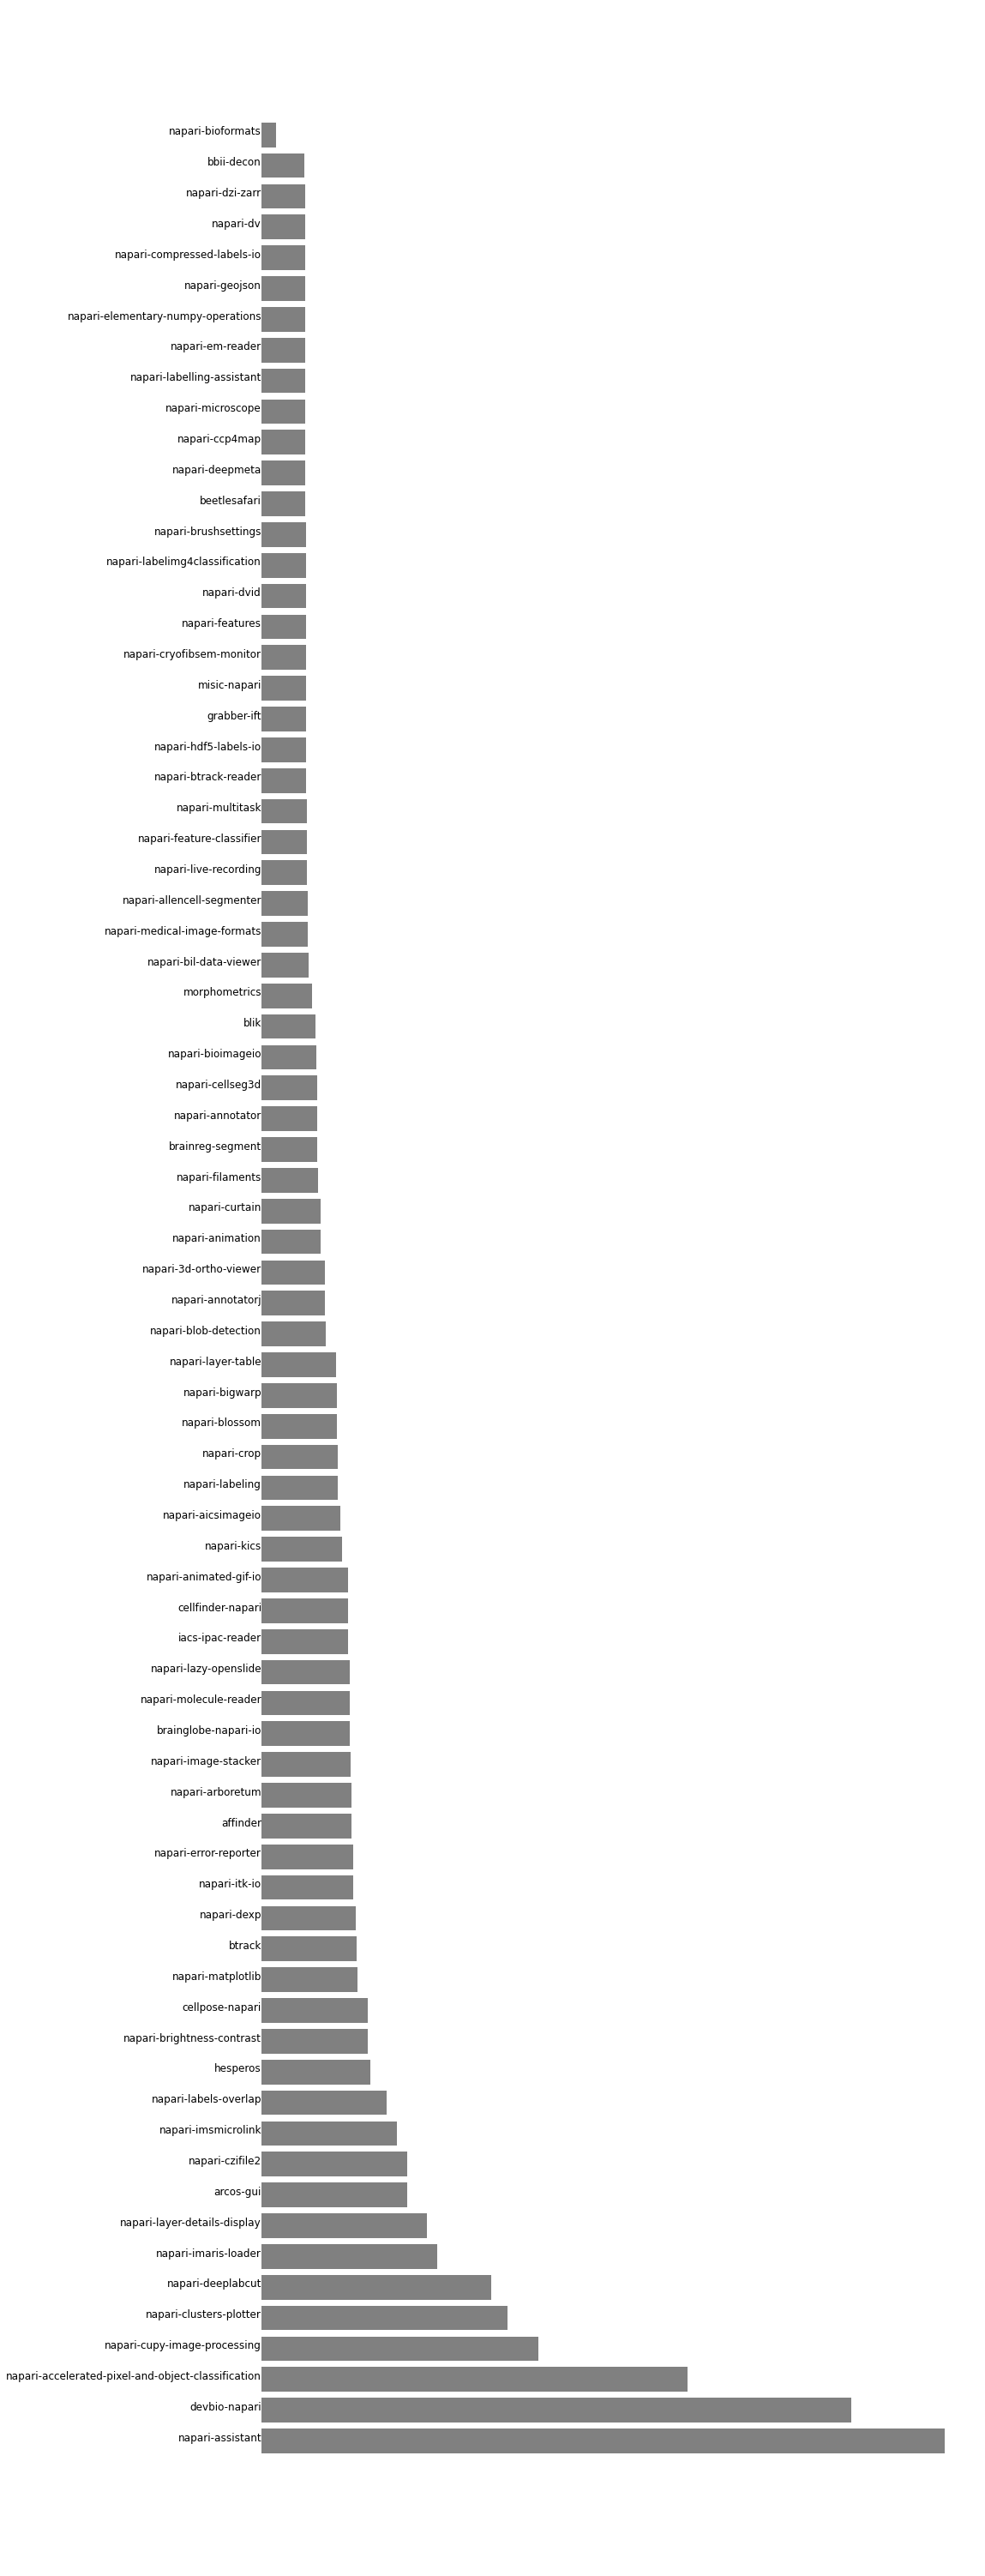

In [14]:
def plot_data(df, column='conda_downloads', width=15,height=55):
    f, ax = plt.subplots(1,1,figsize=(width,height))
    # ax = plt.subplot(111, fig_size=(15, 15))
    #df[column].plot(ax=ax, kind='barh', title='ranking')
    ax.axis('off')
    for i, x in enumerate(df['plugin']):
        plt.barh(i, df[column][i], color = 'grey')
        ax.text(0, i, x, ha='right', fontsize='large')
        
plot_data(df)